1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.


Eigendecomposition:

Eigenvalues: 
 [2.65502618e+01 2.08028984e+00 8.10054013e-16]
Eigenvectors: 
 [[-0.12742582  0.56311277 -0.81649658]
 [-0.56224366 -0.71917689 -0.40824829]
 [-0.8170953   0.40704866  0.40824829]]

SVD:

Eigenvalues: 
 [2.65620425e+01 2.08037598e+00 5.78003677e-30]
Eigenvectors: 
 [[-0.12744899  0.56310753 -0.81649658]
 [-0.56221406 -0.71920003 -0.40824829]
 [-0.81711205  0.40701503  0.40824829]]

Are the eigenvalues of eigendecomposition and SVD equal? False
Are the eigenvectors of eigendecomposition and SVD equal? False
Same eigenvector but slightly different eigenvalues because of different precision

Using the principal components, the percent of the total dataset's variability is 100.0%
Given how the dataset was constructed, this makes sense since we saw that x3 was given by 2x1+x2, so it should explain less variability than the other two.


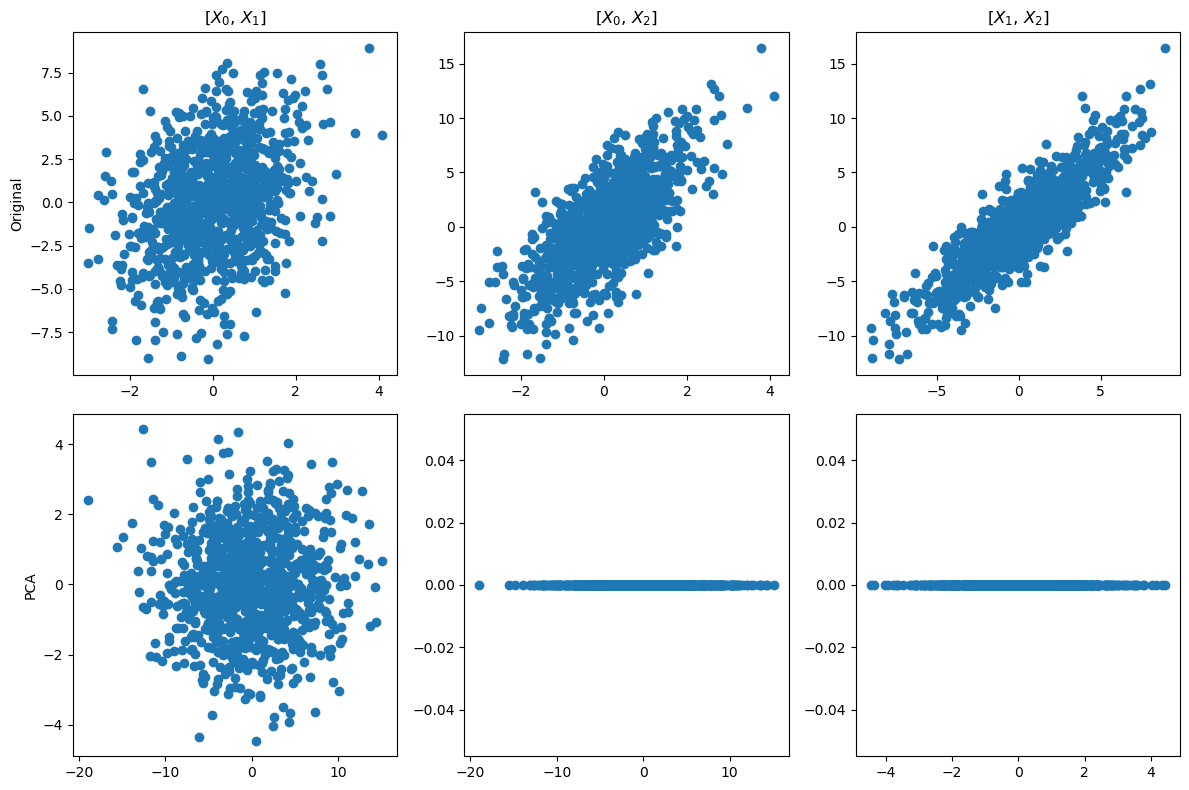

In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

# Generate the dataset
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2
X = np.array([x1, x2, x3])

#print(X)

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_X = np.cov(X)
eig_val_cov, eig_vec_cov = la.eig(cov_X)

# take only the real component, if possible
eig_val_cov = np.real_if_close(eig_val_cov)

i = eig_val_cov.argsort()[::-1]
eig_val_cov = eig_val_cov[i]
eig_vec_cov = eig_vec_cov[:,i]

print("\nEigendecomposition:\n")
print("Eigenvalues: \n", eig_val_cov)
print("Eigenvectors: \n", eig_vec_cov)

# Find the eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(X)

eig_val_svd = S**2/(N-1)
eig_vec_svd = U

i = eig_val_svd.argsort()[::-1]
eig_val_svd = eig_val_svd[i]
eig_vec_svd = eig_vec_svd[:,i]

print("\nSVD:\n")
print("Eigenvalues: \n", eig_val_svd)
print("Eigenvectors: \n", eig_vec_svd)

# Check that the two procedures yield to same result

print("\nAre the eigenvalues of eigendecomposition and SVD equal?", np.allclose(eig_val_cov, eig_val_svd))
print("Are the eigenvectors of eigendecomposition and SVD equal?", np.allclose(eig_vec_cov, eig_vec_svd))
print("Same eigenvector but slightly different eigenvalues because of different precision")

# What percent of the total dataset's variability is explained by the principal components?
# Given how the dataset was constructed, do these make sense?
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained
# Compute the total variance explained by the principal components

# Compute the percentage of total variance explained by the principal components
var_perc = (np.sum(eig_val_cov[:2])/np.sum(eig_val_cov))*100

print(f"\nUsing the principal components, the percent of the total dataset's variability is {var_perc}%")
print("Given how the dataset was constructed, this makes sense since we saw that x3 was given by 2x1+x2, so it should explain less variability than the other two.")

# Redefine the data according to the new basis from the PCA
vect_perc = eig_vec_cov[:,:2]
X_perc = np.dot(vect_perc.T, X)
X_perc = np.vstack([X_perc, np.zeros((1, N))]) 

# Plots
fig, axs = plt.subplots(2,3, figsize=(12,8))

axs[0,0].scatter(X[0,:], X[1,:])
axs[0,1].scatter(X[0,:], X[2,:])
axs[0,2].scatter(X[1,:], X[2,:])
axs[1,0].scatter(X_perc[0,:], X_perc[1,:])
axs[1,1].scatter(X_perc[0,:], X_perc[2,:])
axs[1,2].scatter(X_perc[1,:], X_perc[2,:])

axs[0,0].set_title('[$X_0$, $X_1$]')
axs[0,1].set_title('[$X_0$, $X_2$]')
axs[0,2].set_title('[$X_1$, $X_2$]')
axs[0,0].set_ylabel('Original')
axs[1,0].set_ylabel('PCA')
plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
# Add uncorrelated random noise to the dataset you have genereted in the previous exercise

n = [np.random.randn(N)/20 for i in range(10)] 

X = np.vstack([X, n[0], n[1], n[2], n[3], n[4], n[5], n[6], n[7], n[8], n[9]])

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_X = np.cov(X)
eig_val_cov, eig_vec_cov = la.eig(cov_X)

# take only the real component, if possible
eig_val_cov = np.real_if_close(eig_val_cov)

i = eig_val_cov.argsort()[::-1]
eig_val_cov = eig_val_cov[i]
eig_vec_cov = eig_vec_cov[:,i]

print("\nEigendecomposition:\n")
print("Eigenvalues: \n", eig_val_cov)
print("Eigenvectors: \n", eig_vec_cov)

# Find the eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(X)

eig_val_svd = S**2/(N-1)
eig_vec_svd = U

i = eig_val_svd.argsort()[::-1]
eig_val_svd = eig_val_svd[i]
eig_vec_svd = eig_vec_svd[:,i]

print("\nSVD:\n")
print("Eigenvalues: \n", eig_val_svd)
print("Eigenvectors: \n", eig_vec_svd)

# Check that the two procedures yield to same result

print("\nAre the eigenvalues of eigendecomposition and SVD equal?", np.allclose(eig_val_cov, eig_val_svd))
print("Are the eigenvectors of eigendecomposition and SVD equal?", np.allclose(eig_vec_cov, eig_vec_svd))
print("Same eigenvector but slightly different eigenvalues because of different precision")

var_perc_2 = (np.sum(eig_val_cov[:2])/np.sum(eig_val_cov))*100
var_perc_12 = (np.sum(eig_val_cov[:12])/np.sum(eig_val_cov))*100

print(f"\nUsing the 2 principal components, the percent of the total dataset's variability is {var_perc_2}%")
print(f"Using the 12 principal components, the percent of the total dataset's variability is {var_perc_12}%")


Eigendecomposition:

Eigenvalues: 
 [2.65502828e+01 2.08030536e+00 3.08142832e-03 2.87998146e-03
 2.72672056e-03 2.65135816e-03 2.59210309e-03 2.48536608e-03
 2.33878711e-03 2.31384457e-03 2.15238194e-03 2.05101819e-03
 1.66794251e-15]
Eigenvectors: 
 [[-1.27425766e-01 -5.63110670e-01  7.11215694e-05  2.45297810e-04
  -5.34599782e-05 -5.51688343e-05  9.20535250e-04 -5.77373121e-04
  -7.21711177e-04 -7.17263554e-05  1.64057933e-04 -7.58807469e-04
  -8.16496581e-01]
 [-5.62243442e-01  7.19174196e-01 -1.21249647e-04  5.05645919e-05
   4.89473737e-05 -3.26419775e-04 -1.42522264e-03  7.05520484e-04
   8.80017437e-04  8.28165331e-05 -1.45675126e-05  8.26551366e-04
  -4.08248290e-01]
 [-8.17094974e-01 -4.07047144e-01  2.09934919e-05  5.41160213e-04
  -5.79725828e-05 -4.36757443e-04  4.15847859e-04 -4.49225759e-04
  -5.63404916e-04 -6.06361777e-05  3.13548353e-04 -6.91063572e-04
   4.08248290e-01]
 [ 6.46103805e-05  9.92663369e-04 -7.81309393e-02 -1.97046288e-03
  -9.20151500e-02 -3.10112668e

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 


Eigendecomposition:

Eigenvalues: 
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04]
Eigenvectors: 
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.880017

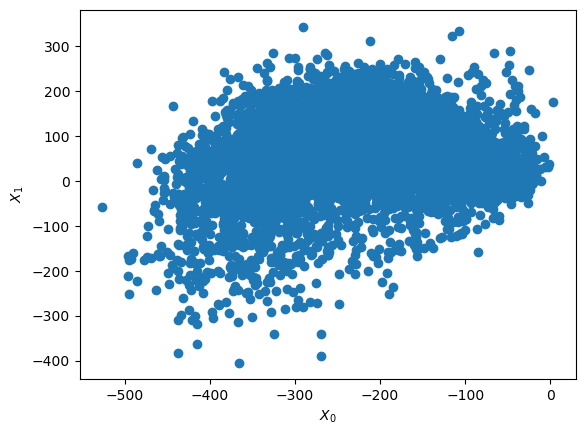

In [5]:
import pandas as pd
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv("./data/magic04.data", header=None)
X = df[[0,1,2,3,4,5,6,7,8,9]]
X = X.T

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov_X = np.cov(X)
eig_val_cov, eig_vec_cov = la.eig(cov_X)

# take only the real component, if possible
eig_val_cov = np.real_if_close(eig_val_cov)

i = eig_val_cov.argsort()[::-1]
eig_val_cov = eig_val_cov[i]
eig_vec_cov = eig_vec_cov[:,i]

print("\nEigendecomposition:\n")
print("Eigenvalues: \n", eig_val_cov)
print("Eigenvectors: \n", eig_vec_cov)

var_perc_2 = np.real(np.sum(eig_val_cov[:2])/np.sum(eig_val_cov))*100
var_perc_5 = np.real(np.sum(eig_val_cov[:5])/np.sum(eig_val_cov))*100
var_perc_6 = np.real(np.sum(eig_val_cov[:6])/np.sum(eig_val_cov))*100

print(f"The percentual of dataset variability using the 2 principal components is {var_perc_2}%")
print(f"The percentual of dataset variability using the 5 principal components is {var_perc_5}%")
print(f"The percentual of dataset variability using the 6 principal components is {var_perc_6}%")

# Redefine the data in the basis yielded by the PCA procedure
eig_vec_cov_perc = eig_vec_cov[:,:2]
X_perc = np.dot(eig_vec_cov_perc.T, X)

# scatter plot for the first two principal components 
plt.figure()
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.scatter(X_perc[0,:], X_perc[1,:])